In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.text as mtext
import matplotlib.transforms as mtransforms

from papercolors import colordict as pcd
import papercolors as pc
import matplotlib.animation as animation
from matplotlib.patches import ConnectionPatch

fs={'normal': 10, 'small':9, 'footnote':8, 'script':7, 'tiny':5, 'heading':12}
paper_path = Path('../figures/')


In [2]:
def tau(xi):
    return xi, np.cos(xi), np.sin(xi)

In [3]:
def plot_rho(i, axc, axr, fig, colors=None):
    colors = dict() if colors is None else colors
    axc.set_aspect(1)
    axr.set_box_aspect(1 / 3)
    axr.yaxis.set_visible(False)
    axr.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])
    axr.set_xlim(0, 2 * np.pi)
    axr.set_ylim(-1.2, 1.2)
    axc.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))
    # draw circle with initial point in left Axes
    x = np.linspace(0, 2 * np.pi, 50)
    alpha = .15
    circ_shadow, = axc.plot(tau(x)[1], tau(x)[2], lw=5,  color=colors.get('i', 'C5'), alpha=alpha)
    circ, = axc.plot(tau(x)[1], tau(x)[2], lw=5,  color=colors.get('i', 'C5'))
    #point, = axc.plot(, markersize = 7,)
    
    # draw full curve to set view limits in right Axes
    sine_shadow, = axr.plot(x, tau(x)[2], color=colors.get('sin', "C0"), lw=5, alpha=alpha)
    sine, = axr.plot(x, tau(x)[2], color=colors.get('sin', "C0"), lw=5)
    cosine_shadow, = axr.plot(x, tau(x)[1], color=colors.get('cos', "C1"), lw=5, alpha=alpha)
    cosine, = axr.plot(x, tau(x)[1], color=colors.get('cos', "C1"), lw=5)
    
    # draw connecting line between both graphs
    csine = ConnectionPatch((1, 0), (0, 0), "data", "data", axesA=axc, axesB=axr, 
                      color="gray", ls="dotted",)
    fig.add_artist(csine)
    ccosine = ConnectionPatch((1, 0), (0, 0), "data", "data", axesA=axc, axesB=axr, 
                      color="gray", ls="dotted",)
    fig.add_artist(ccosine)
    for axs in [axr, axc]:
        axs.spines[:].set_sketch_params(1, 100, 10)
        axs.spines[:].set_color('gray')
        axs.tick_params(colors='gray')
    
    def animate(i):
        
        xsub = np.linspace(i-np.pi/300, i, int(i * 25 / np.pi))
        _, xs, ys = tau(xsub) 
        _, x, y = tau(i)
        sine.set_data(xsub, ys)
        cosine.set_data(xsub, xs)
        circ.set_data(xs, ys)
        #point.set_data([x], [y])
        
        csine.xy1 = x, y
        csine.xy2 = i, y
        ccosine.xy1 = x, y
        ccosine.xy2 = i, x
        return circ, sine, cosine, csine, ccosine
        

    animate(i)


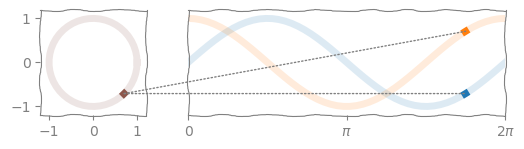

In [4]:
fig, axd = plt.subplot_mosaic([['circ', 'sin']], sharey=True, figsize=(6, 2), 
                              gridspec_kw=dict(width_ratios=[1, 3]))
plot_rho( 7*np.pi/4, axd['circ'], axd['sin'], fig)

In [5]:
def plot_tau(istr, axt, colors):
    celltext = [[f"${istr}$", f"$\cos({istr})$", f"$\sin({istr})$"]]
    fields = ["i", "cos", "sin"]
    table = axt.table(celltext, colLabels=fields, loc='center', cellLoc='center')
    for i, field in enumerate(fields):
        table[0,i].get_text().set_color(pcd['fiber'])
        table[0,i].set_edgecolor(pcd['section'])
        table[1,i].get_text().set_color(colors.get(field, 'k'))
        table[1,i].set_edgecolor(pcd['section'])
    axt.axis('off')
    table.auto_set_font_size(False)
    table.set_fontsize(fs['footnote']-1)
    table.scale(3.5, 1.25)
    return table

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\story\AppData\Local\Temp\ipykernel_26808\1445112207.py:2: SyntaxWarning: invalid escape sequence '\c'
  celltext = [[f"${istr}$", f"$\cos({istr})$", f"$\sin({istr})$"]]
C:\Users\story\AppData\Local\Temp\ipykernel_26808\1445112207.py:2: SyntaxWarning: invalid escape sequence '\s'
  celltext = [[f"${istr}$", f"$\cos({istr})$", f"$\sin({istr})$"]]


In [6]:
def plot_rho_push(i, axrp, colors):
    dot = f'<circle cx={np.cos(i):.2f} cy={np.sin(i):.2f} fill="{mcolors.to_hex(colors['i'])}" stroke="{mcolors.to_hex(colors['i'])}" r=7/>'
    ccurve = f'<path d="L {i:.2f} {np.cos(i):.2f} stroke="{mcolors.to_hex(colors['cos'])}" fill="transparent"/>'
    scurve =  f'<path d="L {i:.2f} {np.sin(i):.2f} stroke="{mcolors.to_hex(colors['sin'])}" fill="transparent"/>'
    cotxt = axrp.annotate(ccurve, xy=(.5, .5), xycoords=axrp.transAxes, va='center', ha='center', color=colors['cos'], fontsize=fs['footnote'])
    ptxt = axrp.annotate(dot, xy=(.5, 1.1),  xycoords=cotxt, color=colors['i'], ha='center', va='bottom', fontsize=fs['footnote'])
    sitxt = axrp.annotate(scurve, xy=(.5, -.1), xycoords=cotxt, va='top', ha='center', color=colors['sin'], fontsize=fs['footnote'])
    axrp.axis('off')
    axrp.set(ylim=(0,1))
    return {'i': ptxt, 'cos':cotxt, 'sin':sitxt}

In [7]:
def plot_tau_pull(istr, axtp, colors):
    pstr = f'$(\cos({istr}), \sin({istr}))$'
    cstr = f'$({istr}, \cos({istr}))$'
    sstr = f'$({istr}, \sin({istr}))$'
    ptxt = axtp.annotate(pstr, xy=(.5, .5), xycoords=( axd['circ'], axtp.transAxes), ha='center', va='center', fontsize=fs['footnote'], color=colors['i'])
    ctxt = axtp.annotate(cstr, xy=(i+np.pi/12, .5),  xycoords=(axd['rho'].transData, ptxt), ha='right', va='center', fontsize=fs['footnote'], color=colors['cos'])
    stxt = axtp.annotate(sstr, xy=(i+np.pi/12, .5),  xycoords=(axd['rho'].transData, ptxt), ha='left', va='center', fontsize=fs['footnote'], color=colors['sin'])
    axtp.axis('off')
    return {'i': ptxt, 'cos':ctxt, 'sin':stxt}

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\story\AppData\Local\Temp\ipykernel_26808\2539856212.py:2: SyntaxWarning: invalid escape sequence '\c'
  pstr = f'$(\cos({istr}), \sin({istr}))$'
C:\Users\story\AppData\Local\Temp\ipykernel_26808\2539856212.py:2: SyntaxWarning: invalid escape sequence '\s'
  pstr = f'$(\cos({istr}), \sin({istr}))$'
C:\Users\story\AppData\Local\Temp\ipykernel_26808\2539856212.py:3: SyntaxWarning: invalid escape sequence '\c'
  cstr = f'$({istr}, \cos({istr}))$'
C:\Users\story\AppData\Local\Temp\ipykernel_26808\2539856212.py:4: SyntaxWarning: invalid escape sequence '\s'
  sstr = f'$({istr}, \sin({istr})

In [8]:
def plot_bases(axk, axs0, axs1):
    t = np.linspace(0, 2*np.pi, 1000)
    k, = axd['k'].plot(tau(t)[1], tau(t)[2], color=pcd['base'], lw=2)
    axk.set_aspect('equal')
    axk.axis('off')
    axk.set(xlim=(-1.75,1.75), ylim=(-1.75,1.75))
    axk.annotate(r"$K$", (.5, -.1), xycoords=k, color=pcd['base'], va='top', ha='center')
                       
    s0 = mpatches.Annulus((0, 0), r=1, width=.5, edgecolor=pcd['base'], facecolor=pc.lighten(pcd['base'], .1))
    axs0.add_patch(s0)
    axs0.set_aspect('equal')
    axs0.axis('off')
    axs0.annotate(r"$S_0$", (.5, -.1), xycoords=s0, color=pcd['base'], va='top', ha='center')
    axs0.set(xlim=(-1.1,1.1), ylim=(-1.1,1.1))

    s1 = mpatches.Rectangle((0, .25), height=.5, width=2*np.pi, edgecolor=pcd['base'], facecolor=pc.lighten(pcd['base'], .1))
    axs1.add_patch(s1)
    axs1.annotate(r"$S_1$", (.5, -.1), xycoords=s1, color=pcd['base'], va='top', ha='center')

    s2 = mpatches.Rectangle((0, -.75), height=.5, width=2*np.pi, edgecolor=pcd['base'], facecolor=pc.lighten(pcd['base'], .1))
    axs1.add_patch(s2)
    axs1.set(xlim=(-.01, 2*np.pi+.1), ylim=(-1, 1))
    axs1.axis('off')
    axs1.annotate(r"$S_2$", (.5, -.1), xycoords=s2, color=pcd['base'], va='top', ha='center')

    return {'k':k, 's0':s0, 's1':s1, 's2': s2}

In [9]:
def plot_xi(axd, bases, fig, biglabels=True, rptexts=None, tptexts=None):
    arrowprops=dict(arrowstyle="->", lw=3, color=pcd['functor'], mutation_scale=30)

    if biglabels:
        if rptexts:
            xi_push = mtext.Annotation("", xytext=(-.5, .5), xy=(.95, .5), 
                                       textcoords=axd['circ'].transAxes, xycoords=(rptexts['i'], rptexts['cos']), 
                                       arrowprops=arrowprops)
                                                                                                                            
        else:
            xi_push = mpatches.ConnectionPatch(xyA = (-.5, .5), xyB = (3, .55),
                                               coordsA=axd['circ'].transAxes, axesA=axd['circ'], 
                                               coordsB = axd['rho_push'].transAxes, axesB = axd['rho_push'],
                                               **arrowprops, zorder=-1)
        
        fig.add_artist(xi_push)
        xi_push_lab = mtext.Annotation(r"$\xi_{*}$", xy=(.5, .5), xycoords=xi_push, va='center', ha='center', 
                           color=pcd['functor'], bbox=dict(facecolor='white', edgecolor='none'), fontsize=fs['normal'])
        fig.add_artist(xi_push_lab)

        if tptexts:
            xi_pull = mtext.Annotation("", xy = (0, .5), xytext = (2.25, .5), 
                                          xycoords=(tptexts['i'], axd['tau_pull']), textcoords =axd['tau'],
                                          arrowprops=arrowprops)
        else:
            xi_pull = mpatches.ConnectionPatch(xyA = (1.85, .5), xyB = (-.25, .5), 
                                           coordsA=axd['tau'].transAxes, axesA=axd['tau'], coordsB = axd['tau_pull'].transAxes, axesB = axd['tau_pull'],
                                           **arrowprops, zorder=-1)
        fig.add_artist(xi_pull)
        xi_pull_lab = mtext.Annotation(r"$\xi^{*}$", xy=(.5, .5), xycoords=xi_pull, va='center', ha='center', 
                           color=pcd['functor'], fontsize=fs['normal'], bbox=dict(facecolor='white', edgecolor='none'))
        fig.add_artist(xi_pull_lab)
    
        xi = mpatches.ConnectionPatch(xyA = (-.25, .5), xyB = (.85, .5), 
                                           coordsA=axd['s0'].transAxes, axesA=axd['s0'], coordsB = axd['k'].transAxes, axesB = axd['k'],
                                           **arrowprops, zorder=-3)
        fig.add_artist(xi)
        xi_lab = mtext.Annotation(r"$\xi$", xy=(.5, .5), xycoords=xi, va='center', ha='center', 
                           color=pcd['functor'], fontsize=fs['normal']+4, bbox=dict(facecolor='white', edgecolor='none'), zorder=-2)
        fig.add_artist(xi_lab)
    
    k1, = axd['k'].plot(tau(i)[1], tau(i)[2], marker='o', markersize=4, color=pcd['functor'])
    s0, = axd['s0'].plot((tau(i)[1]*.5, tau(i)[1]), (tau(i)[2]*.5, tau(i)[2]), color=pcd['functor'], lw=3)
    s1, = axd['s1'].plot((i, i), (bases['s1'].get_xy()[1],  bases['s1'].get_xy()[1]+ bases['s1'].get_height()), color=pcd['functor'], lw=3)
    s2, = axd['s1'].plot((i, i), (bases['s2'].get_xy()[1],  bases['s2'].get_xy()[1]+ bases['s2'].get_height()), color=pcd['functor'], lw=3)
    axd['k'].annotate(r"$k_i$", xy=(.5, -.5), xycoords=k1, color=pcd['functor'], fontsize=fs['normal']-2, va='top', ha='left')
    axd['s0'].annotate(r"$\xi^{-1}(k_i)$", xy=(.8, -.3), xycoords=s0, color=pcd['functor'], fontsize=fs['normal']-2, va='top', ha='left')
    axd['s1'].annotate(r"$\xi^{-1}(k_i)$", xy=(.5, -.1), xycoords=s1, color=pcd['functor'], fontsize=fs['normal']-2, va='top', ha='center')
    axd['s1'].annotate(r"$\xi^{-1}(k_i)$", xy=(.5, -.1), xycoords=s2, color=pcd['functor'], fontsize=fs['normal']-2, va='top', ha='center')
    return {'k':k1, 's0':s0, 's1':s1, 's2':s2}


In [10]:
def plot_sections(axd, xi_bases, fig, colors):
    arrowprops=dict(arrowstyle="->", color=pcd['section'], lw=.75)
    tarr = mpatches.ConnectionPatch(xyA = (tau(i)[1], tau(i)[2]), xyB = (.5, .8), 
                                   coordsA = axd['k'].transData, axesA=axd['k'], coordsB = axd['tau'].transAxes, axesB=axd['tau'], 
                                   **arrowprops)
    fig.add_artist(tarr)
    tarr_lab = mtext.Annotation(r"$\tau$", (.25, .4), xycoords=tarr, ha='right', va='center', color=pcd['section'], fontsize=fs['normal']-1)
    fig.add_artist(tarr_lab)
    
    rpush_arr = mpatches.ConnectionPatch(xyA = (tau(i)[1], tau(i)[2]), xyB = (.5, .35), 
                                   coordsA = axd['k'].transData, axesA=axd['k'], coordsB = axd['rho_push'].transAxes, axesB=axd['rho_push'], 
                                   **arrowprops)
    fig.add_artist(rpush_arr)
    rpush_arr_lab = mtext.Annotation(r"$\xi_*\rho$", (.25, .75), xycoords=rpush_arr, ha='right', va='center', color=pcd['section'], fontsize=fs['normal']-1)
    fig.add_artist(rpush_arr_lab)
    
    xs = xi_bases['s0'].get_xdata()
    ys = xi_bases['s0'].get_ydata()
    xl = np.linspace(xs[0], xs[1], 4)
    yl = np.interp(xl, xs, ys)
    xbase = tau(i)[1]
    ybase = tau(i)[2]
    xmargin = .1
    ymargin = .1
    ticoords =  mtransforms.BlendedGenericTransform(axd['circ'].transAxes, axd['tau_pull'].transAxes)
    s0_rho_arrs = []
    s0_tau_pull_arrs = []
    tptexts['i']
    arrowprops.pop('arrowstyle')
    for xi, yi in zip(xl, yl):
        bx = np.random.uniform(xbase-xmargin, xbase+xmargin)
        by = np.random.uniform(ybase-ymargin, ybase+ymargin)
        s0_rho =  mpatches.ConnectionPatch(xyA = (xi, yi), xyB = (bx, by),
                                           coordsA = axd['s0'].transData, axesA=axd['s0'], 
                                           coordsB = axd['circ'].transData, axesB=axd['circ'], 
                                   **arrowprops, arrowstyle="->, head_width=.1",  connectionstyle='arc3, rad=.1')
        fig.add_artist(s0_rho)
        s0_rho_arrs.append(s0_rho)
        
        s0_tau_pull =  mpatches.ConnectionPatch(xyA = (xi, yi), xyB = (.5, .6),
                                           coordsA = axd['s0'].transData, axesA=axd['s0'], 
                                           coordsB = ticoords,  axesB=axd['tau_pull'], 
                                   **arrowprops, arrowstyle="->", connectionstyle='arc3, rad=.1')
        fig.add_artist(s0_tau_pull)
        s0_tau_pull_arrs.append(s0_tau_pull)
    
    s0_rho_lab = mtext.Annotation(r"$\rho$", (.25, .5), xycoords=s0_rho_arrs[0], ha='right', va='center', color=pcd['section'], fontsize=fs['normal']-1)
    fig.add_artist(s0_rho_lab)
    s0_tau_lab = mtext.Annotation(r"$\xi^*\tau$", (0, .4), xycoords=s0_tau_pull_arrs[0], ha='right', va='center', color=pcd['section'], fontsize=fs['normal']-1)
    fig.add_artist(s0_tau_lab)
    
    xs = xi_bases['s1'].get_xdata()
    ys1 = xi_bases['s1'].get_ydata()
    ys2 = xi_bases['s2'].get_ydata()
    xbase = i
    sybase = tau(i)[2]
    cybase = tau(i)[1]
    xmargin=.1
    ymargin=.1
    t2coords =  mtransforms.BlendedGenericTransform(axd['rho'].transData, axd['tau_pull'].transAxes)
    s1_rho_arrs = []
    s1_tau_pull_arrs = []
    
    for yi1, yi2 in  zip(np.linspace(ys1[0], ys1[1], 5), np.linspace(ys2[0], ys2[1], 5)):
        
        bx = np.random.uniform(xbase-xmargin, xbase+xmargin)
        by = np.random.uniform(sybase-ymargin, sybase+ymargin)
        s1_rho =  mpatches.ConnectionPatch(xyA = (xs[0], yi2), xyB = (i, by),
                                           coordsA = axd['s1'].transData, axesA=axd['s1'], 
                                           coordsB = axd['rho'].transData, axesB=axd['rho'], 
                                   **arrowprops, arrowstyle="->, head_width=.1", 
                                           connectionstyle='arc3, rad=.5')
        fig.add_artist(s1_rho)
        s1_rho_arrs.append(s1_rho)
    
        s1_tau_pull =  mpatches.ConnectionPatch(xyA = (xs[0], yi2), xyB = (i+np.pi*.6, .6),
                                           coordsA = axd['s1'].transData, axesA=axd['s1'], 
                                           coordsB = t2coords, axesB=axd['rho'], 
                                   **arrowprops, arrowstyle="->", connectionstyle='arc3, rad=-.7')
        fig.add_artist(s1_tau_pull)
        s1_tau_pull_arrs.append(s1_tau_pull)
    
        
        by = np.random.uniform(cybase-ymargin, cybase+ymargin)
        s1_rho_cos =  mpatches.ConnectionPatch(xyA = (xs[0], yi1), xyB = (bx, by),
                                           coordsA = axd['s1'].transData, axesA=axd['s1'], 
                                           coordsB = axd['rho'].transData, axesB=axd['rho'], 
                                   **arrowprops, arrowstyle="->, head_width=.1", connectionstyle='arc3, rad=-.5')
        fig.add_artist(s1_rho_cos)
        s1_rho_arrs.append(s1_rho_cos)
        
        s1_tau_pull_cos =  mpatches.ConnectionPatch(xyA = (xs[0], yi1), xyB = (i-np.pi*.9, .6),
                                           coordsA = axd['s1'].transData, axesA=axd['s1'], 
                                           coordsB = t2coords, axesB=axd['rho'], 
                                   **arrowprops,arrowstyle="->", connectionstyle='arc3, rad=.3')
        fig.add_artist(s1_tau_pull_cos)
        s1_tau_pull_arrs.append(s1_tau_pull_cos)
    
    
    s1_rho_lab = mtext.Annotation(r"$\rho$", (1, .4), xycoords=s1_rho_arrs[5], ha='right', va='center', color=pcd['section'], fontsize=fs['normal']-1)
    fig.add_artist(s1_rho_lab)
    
    s1_tau_pull_lab = mtext.Annotation(r"$\xi^*\tau$", (1, .2), xycoords=s1_tau_pull_arrs[5], ha='right', va='center', color=pcd['section'], fontsize=fs['normal']-1)
    fig.add_artist(s1_tau_pull_lab)

C:\Users\story\miniconda3\envs\paper\Lib\site-packages\IPython\core\events.py:82: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  func(*args, **kwargs)
C:\Users\story\miniconda3\envs\paper\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


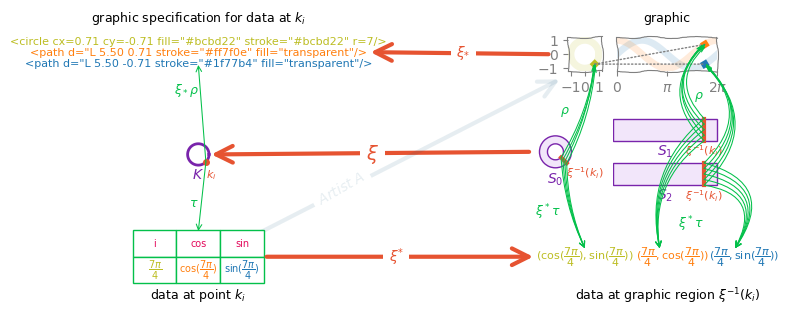

In [11]:
colors = {'i':'tab:olive','sin':'tab:blue', 'cos':'tab:orange'}

i = 7*np.pi/4
istr = r"\dfrac{7\pi}{4}"

fig, axd = plt.subplot_mosaic( [['rho_push', 'xi', [['circ', 'rho', 'rho', 'rho']]], 
                                ['k', 'xi', [['s0', 's1', 's1', 's1']]],['tau', 'xi', 'tau_pull']], 
                                  figsize=(7.16, 3),
                                 height_ratios = [1, 1, 1], layout='compressed')

axd['xi'].axis('off')
plot_rho(i, axd['circ'], axd['rho'], fig, colors)
tautable = plot_tau(istr, axd['tau'], colors)
rptexts = plot_rho_push(i, axd['rho_push'], colors)
tptexts = plot_tau_pull(istr, axd['tau_pull'], colors)
bases = plot_bases(axd['k'], axd['s0'], axd['s1'])
xi_bases = plot_xi(axd, bases, fig, rptexts=rptexts, tptexts=tptexts)
plot_sections(axd, xi_bases, fig, colors)

artist = mpatches.ConnectionPatch(xyA=(2, .75), xyB=(-.25,-.25), coordsA=axd['tau'].transAxes, axesA=axd['tau'], coordsB = axd['circ'].transAxes, axesB = axd['circ'],
                                      arrowstyle="->", lw=3, color=pcd['artist'], mutation_scale=30, alpha=.1, zorder=-1)
fig.add_artist(artist)
axd['xi'].annotate(r"$Artist\;A$", (.2,.2), xycoords=artist, rotation=30, color=pcd['artist'], alpha=.1, zorder=5, bbox=dict(facecolor='white', edgecolor='none'))

rp = axd['rho_push'].annotate("graphic specification for data at $k_i$", (.5, .8), xycoords=axd['rho_push'], ha='center', va='bottom', fontsize=fs['small'])
t = axd['tau'].annotate("data at point $k_i$", (.5, .15), xycoords=(rp, axd['tau']), ha='center', va='top', fontsize=fs['small'])
r = axd['rho'].annotate("graphic", (.5, .5), xycoords=(axd['rho'], rp), ha='center', va='center', fontsize=fs['small']) 
tp = axd['tau_pull'].annotate("data at graphic region $\\xi^{-1}(k_i)$", (.5,.5), xycoords=(r, t), ha='center', va='center', fontsize=fs['small'])

#axd['rho'].text(.5, 1.2, "graphic", transform=axd['rho'].transAxes, ha='center', va='bottom')
#axd['tau'].set_title("data", y = 0)
#axd['tau_pull'].set_title("data for graphic", y=0)

fig.savefig(paper_path/"xi_diagram.png", bbox_inches='tight', dpi=300)
fig.savefig(paper_path/"xi_diagram.pdf",  bbox_inches='tight', dpi=300)

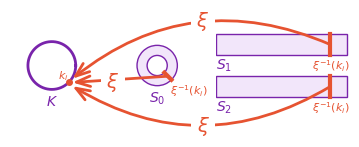

In [12]:
fig, axd = plt.subplot_mosaic([['k', 'xi', 's0', 's1']], 
                              layout='constrained',  figsize=(3.5,1), 
                              width_ratios=[4,1, 2, 6])
bases = plot_bases(axd['k'], axd['s0'], axd['s1'])
xi_bases = plot_xi(axd, bases, fig, biglabels=False)
axd['xi'].axis('off')

val_i, cos_i, sin_i = tau(i)
arrowprops=dict(color=pcd['functor'], arrowstyle="->, head_width=.15", lw=2, mutation_scale=25)
s0w= (bases['s0'].get_width())/3

xs = xi_bases['s0'].get_xdata()
ys = xi_bases['s0'].get_ydata()
mid = lambda p: np.min(p) + np.abs(p[0]-p[1])/2
xm, ym = mid(xs), mid(ys)
pad = np.pi/20
xi_s0 = mpatches.ConnectionPatch(xyA = (xm, ym), xyB = (cos_i+pad, sin_i), 
                                    coordsA=axd['s0'].transData, axesA=axd['s0'], 
                                    coordsB = axd['k'].transData, axesB = axd['k'],
                                    **arrowprops, zorder=2)
fig.add_artist(xi_s0)
y = bases['s1'].get_xy()[-1] + bases['s1'].get_height()/2
xi_s1 = mpatches.ConnectionPatch(xyA = (i, y), xyB = (cos_i+ pad, sin_i+pad), 
                                    coordsA=axd['s1'].transData, axesA=axd['s1'], 
                                    coordsB = axd['k'].transData, axesB = axd['k'],
                                    **arrowprops, zorder=2, connectionstyle='arc3, rad=.3')
fig.add_artist(xi_s1)
y = bases['s2'].get_xy()[-1] + bases['s2'].get_height()/2
xi_s2 = mpatches.ConnectionPatch(xyA = (i, y), xyB = (cos_i+pad, sin_i-pad), 
                                    coordsA=axd['s1'].transData, axesA=axd['s1'], 
                                    coordsB = axd['k'].transData, axesB = axd['k'],
                                    **arrowprops, zorder=2, connectionstyle='arc3,rad=-.3')
fig.add_artist(xi_s2)

a = [a for a in axd['k'].findobj(mtext.Annotation) if a.get_text()=='$k_i$'][0]
a.set_position((-1.5, 3))
[(a.set_x(0), a.set_ha('left')) for a in axd['s1'].findobj(mtext.Annotation) if a.get_text().startswith('$S_')]

xi_s0_lab = mtext.Annotation(r"$\xi$", xy=(.4, .5), xycoords=xi_s0, va='center', ha='center', 
         color=pcd['functor'], fontsize=fs['normal']+4, bbox=dict(facecolor='white', edgecolor='none'))
fig.add_artist(xi_s0_lab)

xi_s1_lab = mtext.Annotation(r"$\xi$", xy=(.5, 1), xycoords=xi_s1, va='center', ha='center', 
         color=pcd['functor'], fontsize=fs['normal']+4, bbox=dict(facecolor='white', edgecolor='none'))
fig.add_artist(xi_s1_lab)

xi_s2_lab = mtext.Annotation(r"$\xi$", xy=(.5, 0), xycoords=xi_s2, va='center', ha='center', 
         color=pcd['functor'], fontsize=fs['normal']+4, bbox=dict(facecolor='white', edgecolor='none'))
fig.add_artist(xi_s2_lab)


fig.savefig(paper_path/"xi_zoom.pdf",  bbox_inches='tight', dpi=300)

In [16]:
bases['s1'].get_xy()[-1] + bases['s1'].get_height()/2

0.5

{'tau': <Axes: label='tau'>,
 'mu': <Axes: label='mu'>,
 'rho': <Axes: label='rho'>,
 'k': <Axes: label='k'>,
 'xi': <Axes: label='xi'>,
 's': <Axes: label='s'>}

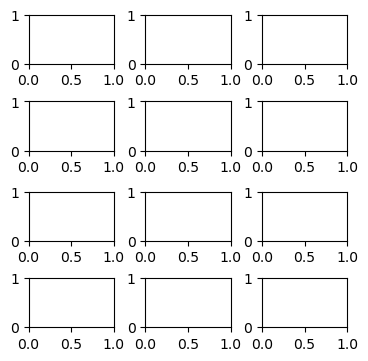

In [18]:
rptexts['i'].get_text()

'<circle cx=0.71 cy=-0.71 fill="#bcbd22" stroke="#bcbd22" r=7/>'